# Inpainting

Projet ARF - 2017/2018

In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Préambule : régression linéaire, régression ridge et LASSO

![./images/Q1.1.png](attachment:Q1.1.png)

Protocole expérimental pour comparer les trois algos dans le contexte de la classif plug-in:
 - regression linéaire
 - régression ridge
 - algo LASSO

### Experimentation

Nous allons tester avec le meme jeu d'entrainement et de test les trois algorithmes dans le contexte de la classifications plug-in.
Nous testerons avec différents paramètres pour voir comment évolue les résultats ainsi que le nombre de caractéristiques non nulles.

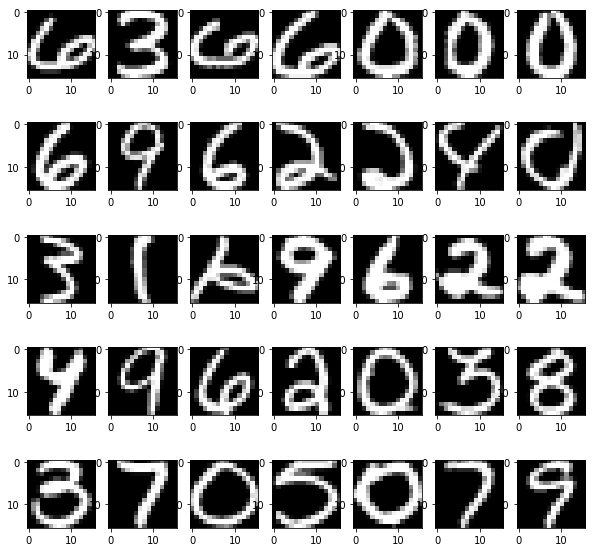

In [98]:
from tools import load_usps, show_sample_usps, show_usps

training_setx, training_sety = load_usps("USPS/USPS_train.txt")
test_setx, test_sety = load_usps("USPS/USPS_test.txt")  

show_sample_usps(test_setx)

In [59]:
# We are only checking if they are equal to 6 or not
number = 6

trainy = np.where(training_sety == number, 1, -1)
testy = np.where(test_sety == number, 1, -1)

trainx = training_setx
testx = test_setx

In [61]:
normalize = False

In [57]:
from tools import filter_values
a = 7
b = 9
trainx, trainy = filter_values(training_setx, training_sety, a, b)
testx, testy = filter_values(test_setx, test_sety, a, b)

In [50]:
def plugin(fct, datax, datay):
    return 1 - np.sum(np.sign(fct.predict(datax)) - datay != 0) / datay.size

In [62]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(normalize=normalize).fit(trainx, trainy)

print("Training set score: {:.2f}".format(lr.score(trainx, trainy)))
print("Test set score: {:.2f}\n".format(lr.score(testx, testy)))

print("Training set score: {:.2f}".format(plugin(lr, trainx, trainy)))
print("Test set score: {:.2f}".format(plugin(lr, testx, testy)))

Training set score: 0.68
Test set score: 0.61

Training set score: 0.98
Test set score: 0.98


In [63]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0, normalize=normalize).fit(trainx, trainy)

print("Training set score: {:.2f}".format(ridge.score(trainx, trainy)))
print("Test set score: {:.2f}\n".format(ridge.score(testx, testy)))

print("Training set score: {:.2f}".format(plugin(ridge, trainx, trainy)))
print("Test set score: {:.2f}".format(plugin(ridge, testx, testy)))

Training set score: 0.68
Test set score: 0.61

Training set score: 0.98
Test set score: 0.98


In [64]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.00001,normalize=normalize).fit(trainx, trainy)

print("Training set score: {:.2f}".format(lasso.score(trainx, trainy)))
print("Test set score: {:.2f}\n".format(lasso.score(testx, testy)))

print("Training set score: {:.2f}".format(plugin(lasso, trainx, trainy)))
print("Test set score: {:.2f}".format(plugin(lasso, testx, testy)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.68
Test set score: 0.61

Training set score: 0.98
Test set score: 0.98
Number of features used: 252


In [65]:
def h(model, alpha, datax, datay, datatestx, datatesty):
    trainedModel = model(alpha=alpha,normalize=True).fit(datax, datay)
    return [plugin(trainedModel, datax, datay), \
           plugin(trainedModel, datatestx, datatesty), \
           np.sum(trainedModel.coef_ != 0), \
           alpha]

lassoTest = [h(Lasso, i, trainx, trainy, testx, testy) for i in np.arange(0.000, 0.003, 0.0001)]
ridgeTest = [h(Ridge, i, trainx, trainy, testx, testy) for i in np.arange(0.0, 10, 0.5)]

/Users/samutamminen/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  from ipykernel import kernelapp as app
/Users/samutamminen/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/samutamminen/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [90]:
from tools import validation_croisee
N = 5 # let's turn cross validation 5 times
def h(model, alpha, datax, datay):
    model_instance = model(alpha=alpha,normalize=normalize)
    scoring_methods = [lambda trainedModel,x,y: plugin(trainedModel, x, y),
                       lambda trainedModel,_,__: np.sum(trainedModel.coef_ != 0),
                       lambda trainedModel,_,__: alpha]
    return validation_croisee(model_instance, scoring_methods, N, datax, datay)

#lassoTest = [h(Lasso, a, trainx, trainy) for a in np.arange(0.0001, 0.003, 0.0001)]
ridgeTest = [h(Ridge, a, trainx, trainy) for a in np.arange(0.0001, 5, 0.1)]

In [91]:
lassoTest = [h(Lasso, a, trainx, trainy) for a in np.arange(0.0001, 0.003, 0.001)]

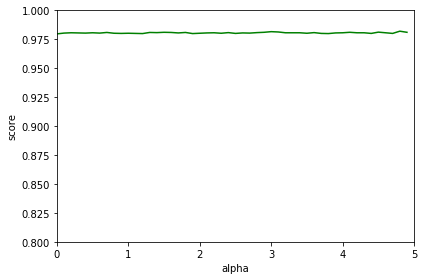

In [95]:
fig, ax1 = plt.subplots()

#ax1.plot([i[3] for i in ridgeTest], [i[1] for i in ridgeTest], 'r')
#ax1.plot([i[3] for i in ridgeTest], [i[0] for i in ridgeTest], 'g')
ax1.plot([i[2] for i in ridgeTest], [i[0] for i in ridgeTest], 'g')

ax1.set_ylabel('score')
ax1.set_xlabel('alpha')
ax1.axis((0,5,0.8,1))

fig.tight_layout()
plt.show()

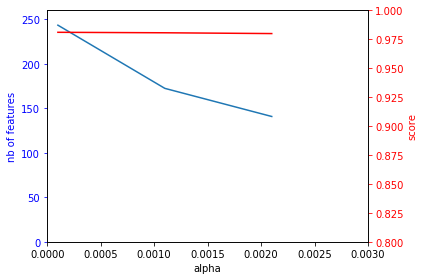

In [96]:
fig, ax1 = plt.subplots()
ax1.plot([i[2] for i in lassoTest], [i[1] for i in lassoTest])
ax1.set_xlabel('alpha')
ax1.set_ylabel('nb of features', color='b')
ax1.axis((0,0.003,0,260))
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot([i[2] for i in lassoTest], [i[0] for i in lassoTest], 'r')
#ax2.plot([i[] for i in lassoTest], [i[0] for i in lassoTest], 'g')
ax2.set_ylabel('score', color='r')
ax2.axis((0,0.003,0.8,1))
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()

### Resultats

#### Regression Lineaire



#### Regression Ridge

On peut voir que la régression Ridge donne de moins bons résultats sur l'ensemble d'apprentissage que la régression linéaire mais est meilleur pour généraliser. Ceci est cohérent puisque qu'une régression linéaire tend a sur-apprendre, donnant ainsi de meilleurs performances sur le jeu d'apprentissage mais une moins bonne généralisation.

#### Algorithme du LASSO

La régularisation L1 (utilisé par l'algorithme du LASSO) a pour effet de mettre certain coefficient à zero. Ainsi certaine caractéristique sont totalement ignoré par le modèle. 

On peut le voir comme une sélection automatique des caractéristiques ce qui permet de révéler quelles sont celles qui sont les plus importantes pour le modèle. Un modèle avec moins de coéfficients est souvent plus facile a interpréter, a moins de chance de surapprendre et donc généralise mieux.

## Les poids du model

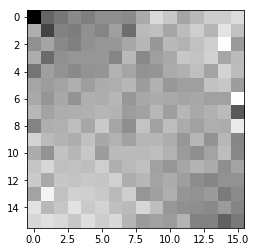

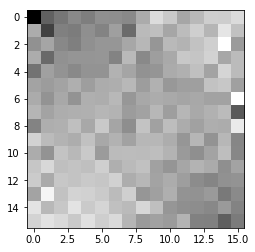

In [101]:
show_usps(ridge.coef_)
plt.figure()
show_usps(lasso.coef_)
# TODO à Samu : essaye differentes combinations